In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/Dataset_spine.csv')

In [3]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [4]:
data.shape

(310, 14)

In [5]:
data.drop(columns='Unnamed: 13',inplace=True)
col_name = ['pelvic_incidnece','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis',
           'pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Class_att']
data.columns = col_name

data.head(10)

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal


In [6]:
data.Class_att = [1 if each == "Abnormal" else 0 for each in data.Class_att]

In [7]:
data.describe()

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


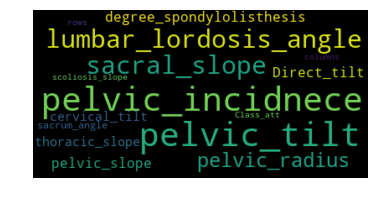

In [8]:
wordcloud = WordCloud(max_font_size=42).generate(str(data))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

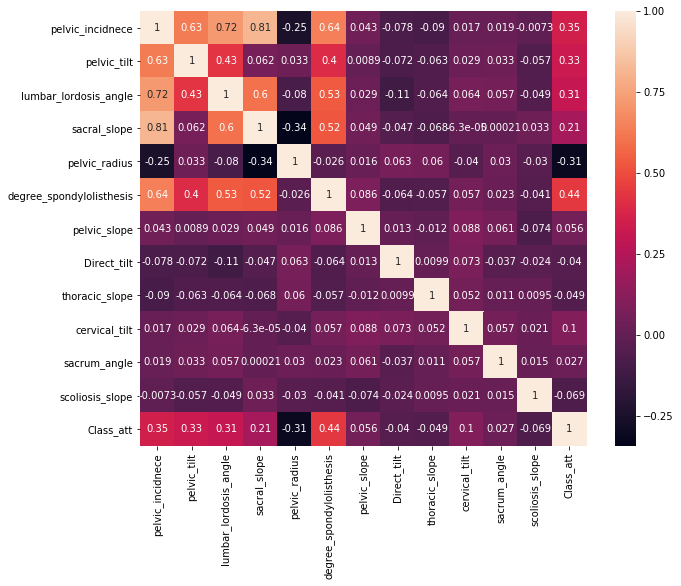

In [9]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

In [10]:
y = data.Class_att.values
new_data = data.drop(["Class_att"],axis=1)
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =42)

## Neural Network

In [11]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [12]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01) #
    b = 0.0 
    return w,b

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    y_head = sigmoid(np.dot(w.T,x_train) + b)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight" : derivative_weight, "derivative_bias" : derivative_bias}
    
    return cost,gradients

def update_weight_and_bias(w,b,x_train,y_train,learning_rate,iteration_num) :
    cost_list = []
    index = []
    for i in range(iteration_num):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivative_bias"]
        cost_list.append(cost)
        index.append(i)

    parameters = {"weight": w,"bias": b}
    
    print("iteration_num:",iteration_num)
    print("cost:",cost)


    plt.plot(index,cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

def predict(w,b,x_test):
    z = np.dot(w.T,x_test) + b
    y_predicted_head = sigmoid(z)
    y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(y_predicted_head.shape[1]):
        if y_predicted_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

## Logistic Regression

In [13]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,iteration_num):
    dimension = x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients = update_weight_and_bias(w,b,x_train,y_train,learning_rate,iteration_num)
    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
  
    print("manuel test accuracy:",(100 - np.mean(np.abs(y_prediction - y_test))*100)/100)

iteration_num: 10
cost: 0.604373867851


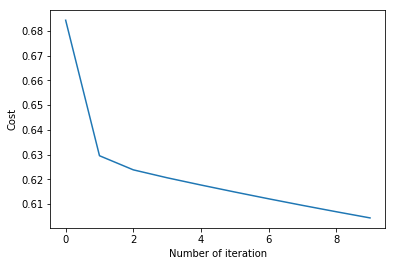

manuel test accuracy: 0.709677419355


In [14]:
logistic_regression(x_train,y_train,x_test,y_test,1,10)

iteration_num: 10
cost: 5.00588489611


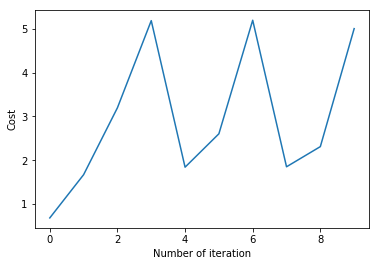

manuel test accuracy: 0.709677419355


In [15]:
logistic_regression(x_train,y_train,x_test,y_test,10,10)

iteration_num: 200
cost: 0.457910509558


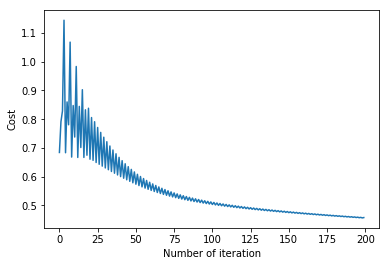

manuel test accuracy: 0.806451612903


In [16]:
logistic_regression(x_train,y_train,x_test,y_test,4,200)

## Compare my NN with SciKit-Learn

In [17]:
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)

print("sklearn test accuracy:", lr.score(x_test.T,y_test.T))

sklearn test accuracy: 0.725806451613


## Random ForestClassifer

In [18]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=0.3,random_state=42)
n_trees = [10,50,100,200,300]
for i in n_trees:
    ran_for = RandomForestClassifier(n_estimators=i)
    ran_for.fit(x_train2,y_train2)
    pred = ran_for.predict(x_test2)
    print('Trees: {}'.format(i))
    correct_pred = 0
    for j,k in zip(y_test2,pred):
        if j == k:
            correct_pred += 1
    print('correct predictions: {}'.format(correct_pred/len(y_test2) *100))


Trees: 10
correct predictions: 83.87096774193549
Trees: 50
correct predictions: 78.49462365591397
Trees: 100
correct predictions: 77.41935483870968
Trees: 200
correct predictions: 76.34408602150538
Trees: 300
correct predictions: 78.49462365591397
